**Basic fitting setup and run**

26/07/23

- Revisiting and tidying up.
- KEEP matplotlib plots, these appear nicely in PDF output. Additional HV plots nice, but only in PDF with glue().
- Shuffled section ordering a little bit
- Now included batch example as text only (non-executable).
- REMOVED notes and scratch cells, were triggering build issues. See `_drafts` dir for extended notes.

26/04/23

STATUS: copy-pasted bunch o'stuff from docs and dev notebooks, needs some work but mostly in place. Didn't add to build as yet.

See also:

- Sym fitting dev, http://jake:9966/lab/tree/QM3/doc-source/part2/sym-fitting_dev_130423.ipynb
- Sym fitting intro, http://jake:9966/lab/tree/QM3/doc-source/part2/sym-fitting-intro_220423.ipynb

For fitting stuff:

- Docs: https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_basic_demo_030621-full_010922.html
- General: `code-share/jake-notebooks/pemtk-dev/multiFit_tests_and_parallel/`
- Initial QM3 build tests: http://jake:9966/lab/tree/code-share/jake-notebooks/pemtk-dev/multiFit_tests_and_parallel/PEMtk_fitting_multiproc_class_analysis_141121-SCRATCHpkgTest-hvplotTests-JAKE-QM3-docker_030423.ipynb
- MF recon manuscript plotting dev: http://jake:9966/lab/tree/code-share/stimpy-docker-local/MFPADs_recon_manuscript_dev_April_2022/MFrecon_manuscript_fig_generation_170422-Stimpy_MAIN-oldPkgs.ipynb

In this notebook cover pulling ePS data from standard sources, running fits and data IO.

TO DECIDE: full general intro here, or just run scripted version? In general there are a few things that might change, e.g. ADM times etc.

% PLOTTING - one liner with hvplot, or longer from http://jake:9966/lab/tree/code-share/stimpy-docker-local/MFPADs_recon_manuscript_dev_April_2022/MFrecon_manuscript_fig_generation_170422-Stimpy_MAIN-oldPkgs.ipynb

% ISN'T THIS NOW WRAPPED....????????

% YES, but backend=hv currently not working for ADM plot defaults.

(sect:basic-fit-setup)=
# General fit setup and numerics

For the case studies in {numref}`Chapter %s <chpt:n2-case-study>` - {numref}`%s <chpt:c2h4-case-study>`, the same basic setup and fitting routine is used in all cases, and this is outlined below. In general, this requires the steps outlined in {numref}`Chpt. %s <sect:basis-sets:fitting-intro>` and, for the case studies, configuration additionally requires {{ ePS_full }} *ab initio* {{ RADMATE }}, and {{ ADMs }}, in order to define test datasets ({numref}`Sect. %s <sec:basic-fitting:AFBLM>`). The $N_2$ case study is use as an example in this case, and {numref}`Sect. %s <sec:basic-fitting:fitting>` illustrates both setting test data, and running fits. Additionally, for the case studies herein, the setup routines are wrapped in a basic script, with configuration options for each case included, this is illustrated in {numref}`Sect. %s <sec:basic-fitting:demo-script>`. 

For the case studies, all the sample data is available from the {{ ePSproc_repo }} Github repo, and the examples below include steps for pulling the required data files. Note that further {{ ePS_full }} datasets are available from the {{ ePSdata_repo }}, and [data can be pulled using the python ePSdata interface](https://epsproc.readthedocs.io/en/dev/demos/ePSdata_download_demo_300720.html).

## Init and pulling data

Here the setup is mainly handled by some basic scripts, these follow the outline in the {{ PEMtk_docs }}, see in particular [the intro to fitting](https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_basic_demo_030621-full_010922.html).

In [1]:
# Run default config - may need to set full path here
%run '../scripts/setup_notebook.py'

# Override plotters backend?
# plotBackend = 'pl'

*** Setting up notebook with standard Quantum Metrology Vol. 3 imports...
For more details see https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_basic_demo_030621-full.html
To use local source code, pass the parent path to this script at run time, e.g. "setup_fit_demo ~/github"

*** Running: 2023-07-27 18:29:16
Working dir: /home/jovyan/QM3/doc-source/part2
Build env: notebook

* Loading packages...


* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 


* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.


* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 


* Set Holoviews with bokeh.
Jupyter Book      : 0.15.1
External ToC      : 0.3.1
MyST-Parser       : 0.18.1
MyST-NB           : 0.17.2
Sphinx Book Theme : 1.0.1
Jupyter-Cache     : 0.6.1
NbClient          : 0.7.4


In [2]:
# Pull data files as required from Github, note the path here is required

# *** Method using epsproc.util.io.getFilesFromGithub
# For pulling data from Github, a utility function is available
# This requires the repo subpath, and optionally branch
# The function will pull all files found in the repo path
from epsproc.util.io import getFilesFromGithub

# Set dataName (will be used as download subdir)
dataName = 'n2fitting'
# N2 matrix elements
fDictMatE, fAllMatE = getFilesFromGithub(subpath='data/photoionization/n2_multiorb', dataName=dataName)  
# N2 alignment data
fDictADM, fAllMatADM = getFilesFromGithub(subpath='data/alignment', dataName=dataName)

# *** Alternative method: supply URLs directly for file downloader
# E.g. Pull N2 data from ePSproc Github repo

# URLs for test ePSproc datasets - n2
# For more datasets use ePSdata, see https://epsproc.readthedocs.io/en/dev/demos/ePSdata_download_demo_300720.html
urls = {'n2PU':"https://github.com/phockett/ePSproc/blob/master/data/photoionization/n2_multiorb/n2_1pu_0.1-50.1eV_A2.inp.out",
        'n2SU':"https://github.com/phockett/ePSproc/blob/master/data/photoionization/n2_multiorb/n2_3sg_0.1-50.1eV_A2.inp.out",
        'n2ADMs':"https://github.com/phockett/ePSproc/blob/master/data/alignment/N2_ADM_VM_290816.mat",
        'demoScript':"https://github.com/phockett/PEMtk/blob/master/demos/fitting/setup_fit_demo.py"}

from epsproc.util.io import getFilesFromURLs
fList, fDict = getFilesFromURLs(urls, dataName=dataName)

Querying URL: https://api.github.com/repos/phockett/epsproc/contents/data/photoionization/n2_multiorb
Local file /home/jovyan/QM3/doc-source/part2/n2fitting/n2_1pu_0.1-50.1eV_A2.inp.out already exists
Local file /home/jovyan/QM3/doc-source/part2/n2fitting/n2_3sg_0.1-50.1eV_A2.inp.out already exists
Querying URL: https://api.github.com/repos/phockett/epsproc/contents/data/alignment
Local file /home/jovyan/QM3/doc-source/part2/n2fitting/N2_ADM_VM_290816.mat already exists
Local file /home/jovyan/QM3/doc-source/part2/n2fitting/n2_1pu_0.1-50.1eV_A2.inp.out already exists
Local file /home/jovyan/QM3/doc-source/part2/n2fitting/n2_3sg_0.1-50.1eV_A2.inp.out already exists
Local file /home/jovyan/QM3/doc-source/part2/n2fitting/N2_ADM_VM_290816.mat already exists
Local file /home/jovyan/QM3/doc-source/part2/n2fitting/setup_fit_demo.py already exists


## Setup with options

Following the {{ PEMtk_docs }}, the fitting workspace can be configured by setting:

1. A fitting basis set, either from computational matrix elements, from symmetry constraints, or manually. (See {numref}`Chpt. %s <sect:basis-sets:fitting-intro>` for more discussion.)
1. Data to fit. In the examples herein synthetic data will be created by adding noise to computational results.
1. {{ ADMs }} to use for the fit. Again these may be from computational results, or set manually. If not specified these will default to an isotropic distribution, which may be appropriate in some cases.

In the following subsections each aspect of the configuration is illustrated.

In [3]:
# Initiation - a PEMtk fitting class object

# Set data dir
dataPath = Path(Path.cwd(), dataName)

# Init class object
data = pemtkFit(fileBase = dataPath, verbose = 1)

# Read data files
data.scanFiles()


*** Job subset details
Key: subset
No 'job' info set for self.data[subset].

*** Job orb6 details
Key: orb6
Dir /home/jovyan/QM3/doc-source/part2/n2fitting, 1 file(s).
{   'batch': 'ePS n2, batch n2_1pu_0.1-50.1eV, orbital A2',
    'event': ' N2 A-state (1piu-1)',
    'orbE': -17.09691397835426,
    'orbLabel': '1piu-1'}

*** Job orb5 details
Key: orb5
Dir /home/jovyan/QM3/doc-source/part2/n2fitting, 1 file(s).
{   'batch': 'ePS n2, batch n2_3sg_0.1-50.1eV, orbital A2',
    'event': ' N2 X-state (3sg-1)',
    'orbE': -17.34181645456815,
    'orbLabel': '3sg-1'}


### Alignment distribution moments (ADMs)

The class [wraps ep.setADMs()](https://epsproc.readthedocs.io/en/dev/modules/epsproc.sphCalc.html#epsproc.sphCalc.setADMs) to set {{ ADMs }} to the class data structure. This returns an isotropic distribution by default, or values can be set explicitly from a list. Note: if this is not set, the default value will be used, which is likely not very useful for the fit!

Values are set in `self.data['ADM']`, see {numref}`Sect. %s <sect:theory:alignment>` for more details on {{ ADMs }} and molecular alignment. For the $N_2$ example case, the alignment data is as per the original experimental demonstration of the {{ BOOTSTRAP }} {cite}`marceau2017MolecularFrameReconstruction`, and also [available from the associated data repository](https://doi.org/10.6084/m9.figshare.4480349) {cite}`hockett2017BootstrappingDataFigshare`.

In [4]:
# Default case - isotropic
data.setADMs()
# data.ADM['ADMX']
data.data['ADM']['ADM']

<xarray.DataArray 'ADM' (ADM: 1, t: 1)>
array([[1]])
Coordinates:
  * ADM      (ADM) MultiIndex
  - K        (ADM) int64 0
  - Q        (ADM) int64 0
  - S        (ADM) int64 0
  * t        (t) int64 0
Attributes:
    dataType:   ADM
    long_name:  Axis distribution moments
    units:      arb

````{margin}
```{note}

Full tabulations of the parameters, and some plots, available in HTML or notebook formats only.

```
````

In [5]:
# Load time-dependent ADMs for N2 case
# These are in a Matlab/HDF5 file format
from scipy.io import loadmat
ADMdataFile = os.path.join(dataPath, 'N2_ADM_VM_290816.mat')
ADMs = loadmat(ADMdataFile)

# Set tOffset for calcs, 3.76ps!!!
# This is because this is 2-pulse case, and will set t=0 to 2nd pulse 
# (and matches defn. in N2 experimental paper)
# Marceau, C. et al. (2017) ‘Molecular Frame Reconstruction Using Time-Domain Photoionization Interferometry’, Physical Review Letters, 119(8), p. 083401. Available at: https://doi.org/10.1103/PhysRevLett.119.083401.
tOffset = -3.76
ADMs['time'] = ADMs['time'] + tOffset

data.setADMs(ADMs = ADMs['ADM'], t=ADMs['time'].squeeze(), KQSLabels = ADMs['ADMlist'], addS = True)
data.data['ADM']['ADM']

<xarray.DataArray 'ADM' (ADM: 4, t: 3691)>
array([[ 1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j, ...,
         1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j],
       [-2.26243113e-17+0.00000000e+00j,  2.43430608e-08+1.04125246e-20j,
         9.80188266e-08+6.89166168e-20j, ...,
         1.05433798e-01-1.62495135e-18j,  1.05433798e-01-1.62495135e-18j,
         1.05433798e-01-1.62495135e-18j],
       [ 1.55724057e-16+0.00000000e+00j, -3.37021111e-10-6.81416260e-20j,
         1.95424253e-10-3.10513374e-19j, ...,
         8.39913132e-02-5.12795441e-17j,  8.39913132e-02-5.12795441e-17j,
         8.39913132e-02-5.12795441e-17j],
       [-7.68430227e-16+0.00000000e+00j, -1.40177466e-11+1.04987400e-19j,
         6.33419102e-10+1.74747003e-18j, ...,
         3.78131657e-02+4.01318983e-16j,  3.78131657e-02+4.01318983e-16j,
         3.78131657e-02+4.01318983e-16j]])
Coordinates:
  * ADM      (ADM) MultiIndex
  - K        (ADM) int64 0 2 4 6
  - Q        (ADM) int64 0 0 0 0
  - S        (ADM) int64 0 0 0 0
  * t        (t) float64 -3.76 -3.76 -3.76 -3.759 -3.759 ... 10.1 10.1 10.1 10.1
Attributes:
    dataType:   ADM
    long_name:  Axis distribution moments
    units:      arb

In [6]:
# Manual plot with hvplot for full control and interactive plot
# NOTE: HTML version only.
key = 'ADM'
dataType='ADM'
data.data[key][dataType].unstack().real.hvplot.line(x='t').overlay(['K','Q','S'])

:NdOverlay   [S,Q,K]
   :Curve   [t]   (ADM)

Dataset: ADM, ADM


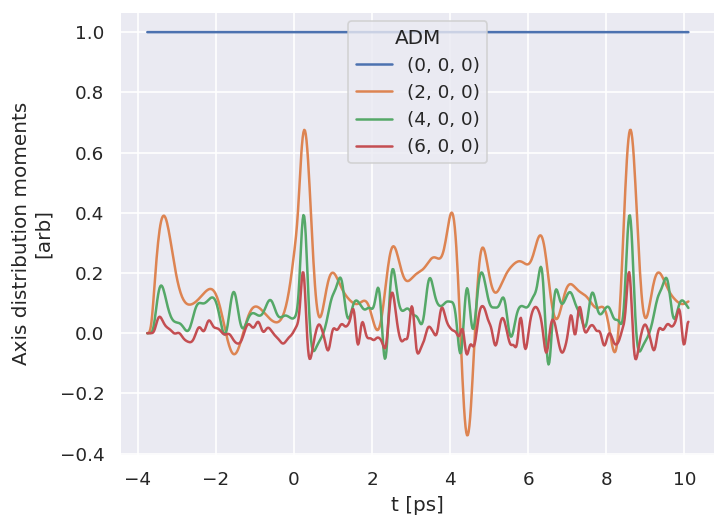

In [7]:
# A basic self.ADMplot routine is also available
%matplotlib inline
data.ADMplot(keys = 'ADM')

In [8]:
# HVplot example
# data.ADMplot(keys = 'ADM', dataType='ADM', backend='hv')  # FAILS, issue with assumed dims?
data.data['ADM']['ADM'].unstack().squeeze().real.hvplot.line(x='t').overlay('K')

:NdOverlay   [K]
   :Curve   [t]   (ADM)

### Polarisation geometry/ies

This wraps [ep.setPolGeoms](https://epsproc.readthedocs.io/en/dev/modules/epsproc.sphCalc.html#epsproc.sphCalc.setPolGeoms). This defaults to (x,y,z) polarization geometries. Values are set in `self.data['pol']`.

Note: if this is not set, the default value will be used, which is likely not very useful for the fit!

In [9]:
data.setPolGeoms()
data.data['pol']['pol']

<xarray.DataArray (Labels: 3)>
array([quaternion(1, -0, 0, 0),
       quaternion(0.707106781186548, -0, 0.707106781186547, 0),
       quaternion(0.5, -0.5, 0.5, 0.5)], dtype=quaternion)
Coordinates:
    Euler    (Labels) object (0.0, 0.0, 0.0) ... (1.5707963267948966, 1.57079...
  * Labels   (Labels) <U32 'z' 'x' 'y'
Attributes:
    dataType:  Euler

### Subselect data

Currently handled in the class by setting `self.selOpts`, this allows for simple reuse of settings as required. Subselected data is set to `self.data['subset'][dataType]` by default (equivalently `self.data[self.subKey][dataType]`), and is the data the fitting routine will use.

In [10]:
# Settings for type subselection are in selOpts[dataType]

# E.g. Matrix element sub-selection
data.selOpts['matE'] = {'thres': 0.01, 'inds': {'Type':'L', 'Eke':1.1}}
data.setSubset(dataKey = 'orb5', dataType = 'matE')  # Subselect from 'orb5' dataset, matrix elements

# And for the polarisation geometries...
data.selOpts['pol'] = {'inds': {'Labels': 'z'}}
data.setSubset(dataKey = 'pol', dataType = 'pol')

# And for the ADMs...
data.selOpts['ADM'] = {}   #{'thres': 0.01, 'inds': {'Type':'L', 'Eke':1.1}}
data.setSubset(dataKey = 'ADM', dataType = 'ADM', sliceParams = {'t':[4, 5, 4]}) 

Subselected from dataset 'orb5', dataType 'matE': 36 from 11016 points (0.33%)
Subselected from dataset 'pol', dataType 'pol': 1 from 3 points (33.33%)
Subselected from dataset 'ADM', dataType 'ADM': 52 from 14764 points (0.35%)


In [11]:
# Note that the class uses data.subKey to reference the correct data internally
print(f'Data dict key: {data.subKey}')
print(f'Data dict contents: {data.data[data.subKey].keys()}')

Data dict key: subset
Data dict contents: dict_keys(['matE', 'pol', 'ADM'])


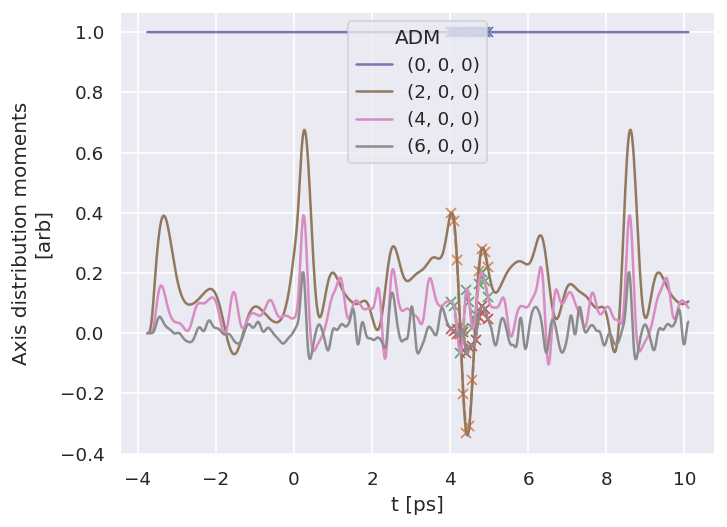

In [12]:
# Check subselected ADMs by plotting vs. full ADM data
# Plot from Xarray vs. full dataset
data.data['subset']['ADM'].real.squeeze().plot.line(x='t', marker = 'x', linestyle='dashed');
data.data['ADM']['ADM'].real.squeeze().plot.line(x='t');

(sec:basic-fitting:AFBLM)=
## Compute AF-$\beta_{LM}$ and simulate data

With all the components set, some observables can be calculated. For testing, this will also be used to simulate an experimental trace (with noise added).

For both basic computation, and fitting, the class method `self.afblmMatEfit()` can be used. This essentially wraps the main {{ AF }} computational routine, `epsproc.afblmXprod()`, to compute AF-$\beta_{LM}$s (for more details, see the [ePSproc method development docs](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_pt3_AFBLM_090620_010920_dev_bk100920.html) and [API docs](https://epsproc.readthedocs.io/en/dev/modules/epsproc.geomFunc.afblmGeom.html#epsproc.geomFunc.afblmGeom.afblmXprod)).

If called without reference data, the method returns computed AF-$\beta_{LM}$s based on the input subsets already created, and also a set of (product) basis functions generated - as illustrated in {numref}`Sect. %s <sec:tensor-formulation>`, these can be examined to get a feel for the sensitivity of the geometric part of the problem, and will also be used as a basis in the fitting routine to limit repetitive computations.

### Compute AF-$\beta_{LM}$s

In [13]:
# Compute with class method
# This uses all data as set to self.data['subset']
BetaNormX, basis = data.afblmMatEfit() 

### AF-$\beta_{LM}$s

The returned objects contain the $\beta_{LM}$ parameters as an Xarray...

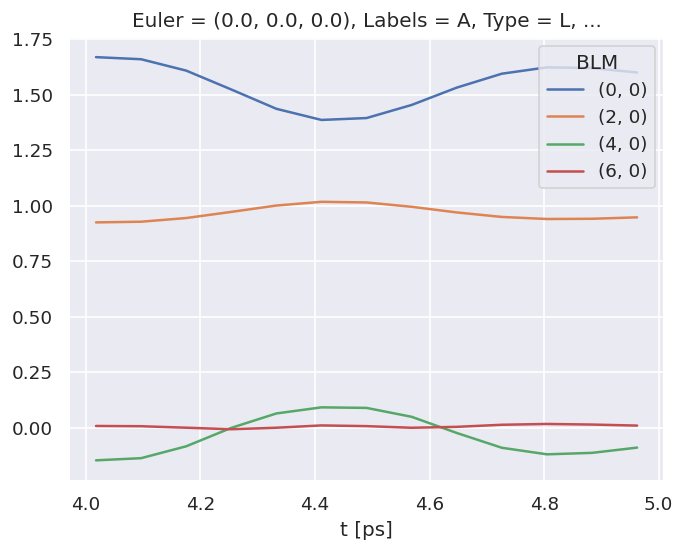

In [14]:
# Line-plot with Xarray/Matplotlib
# Note there is no filtering here, so this includes some invalid and null terms
BetaNormX.sel(Labels='A').real.squeeze().plot.line(x='t');

... and the basis sets as a dictionary. (See {numref}`Sect. %s <sec:tensor-formulation>` for more details on the basis sets.)

In [15]:
basis.keys()

dict_keys(['BLMtableResort', 'polProd', 'phaseConvention', 'BLMRenorm'])

(sec:basic-fitting:fitting)=
## Fitting the data: configuration

As discussed in {numref}`Chpt. %s <chpt:numerical-details>`, general non-linear fitting approaches are used for the {{ BOOTSTRAP }}. These are wrapped in the {{ PEMtk_repo }} for {{ RADMATE }} retrieval problems, as shown below. (And, as discussed in {numref}`Sect. %s <sect:platform:pythonEcosystem>`, make use of the {{ lmfit }} and {{ scipy }} base routines.)

### Set the data to fit

To use the values calculated above as the test data, it currently needs to be set as `self.data['subset']['AFBLM']` for fitting.

In [16]:
# Set computed results to main data structure

# Method 1: Set directly by manual assignment
# data.data['subset']['AFBLM'] = BetaNormX  

# Method 2: Set to main data structure and subset using methods as above
# Set simulated data to master structure as "sim"
data.setData('sim', BetaNormX)  
# Set to 'subset' to use for fitting.
data.setSubset('sim','AFBLM')   

Subselected from dataset 'sim', dataType 'AFBLM': 52 from 52 points (100.00%)


In [17]:
# Set basis functions
data.basis = basis

### Adding noise

For a more realistic test of the {{ BOOTSTRAP }}, noise or other artifacts can be added to the data. Below is a routine for adding random (Gaussian) noise.

Dataset: subset, AFBLM


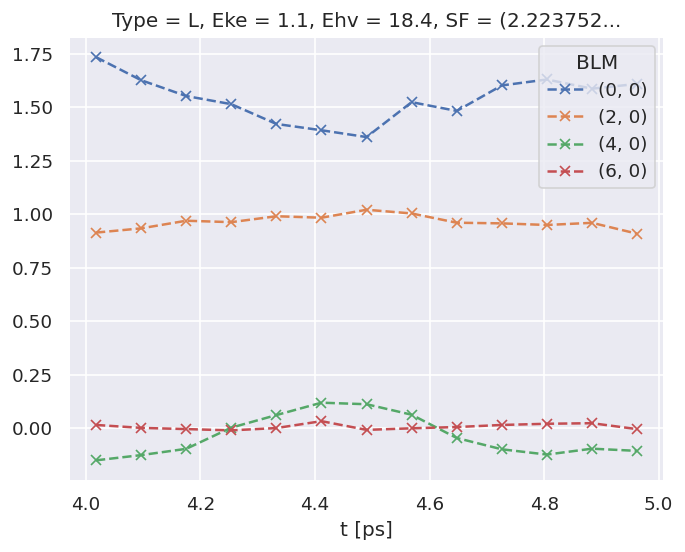

In [18]:
# Add noise with np.random.normal
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
import numpy as np
mu, sigma = 0, 0.05  # Up to approx 10% noise (+/- 0.05)
# creating a noise with the same dimension as the dataset (2,2) 
noise = np.random.normal(mu, sigma, 
                         [data.data['subset']['AFBLM'].t.size, 
                          data.data['subset']['AFBLM'].l.size])
# data.BLMfitPlot()

# Set noise in Xarray & scale by l
import xarray as xr
noiseXR = xr.ones_like(data.data['subset']['AFBLM']) * noise
# Scale by L? This prevents too much high-order noise
noiseXR = noiseXR.where(noiseXR.l<1, noiseXR/(noiseXR.l))  
# Update data for fitting
data.data['subset']['AFBLM'] = data.data['subset']['AFBLM'] + noiseXR
# Remove non-zero m terms?
# This removes additional noise-only channels
data.data['subset']['AFBLM'] = data.data['subset']['AFBLM'].where(data.data['subset']['AFBLM'].m == 0, 0)

# The BLMfitPlot() routine can be used to plot data and fit outputs
data.BLMfitPlot()

### Setting up the fit parameters

As detailed in {numref}`Chpt. %s <sect:basis-sets:fitting-intro>`, fitting requires a basis set and fit parameters. In this case, we can work from the existing matrix elements (as used for simulating data above) to speed up parameter creation, although in practice this may need to be approached *ab initio* or via symmetry - nonetheless, the method will be similar.

In [19]:
# Set matrix elements from ab initio results
data.setMatEFit(data.data['subset']['matE'])

Set 6 complex matrix elements to 12 fitting params, see self.params for details.
Auto-setting parameters.


name,value,initial value,min,max,vary,expression
m_PU_SG_PU_1_n1_1_1,1.78461575,1.784615753610107,1.0000e-04,5.00000000,True,
m_PU_SG_PU_1_1_n1_1,1.78461575,1.784615753610107,1.0000e-04,5.00000000,False,m_PU_SG_PU_1_n1_1_1
m_PU_SG_PU_3_n1_1_1,0.80290495,0.802904951323892,1.0000e-04,5.00000000,True,
m_PU_SG_PU_3_1_n1_1,0.80290495,0.802904951323892,1.0000e-04,5.00000000,False,m_PU_SG_PU_3_n1_1_1
m_SU_SG_SU_1_0_0_1,2.68606212,2.686062120382649,1.0000e-04,5.00000000,True,
m_SU_SG_SU_3_0_0_1,1.10915311,1.109153108617096,1.0000e-04,5.00000000,True,
p_PU_SG_PU_1_n1_1_1,-0.86104140,-0.8610414024232179,-3.14159265,3.14159265,False,
p_PU_SG_PU_1_1_n1_1,-0.86104140,-0.8610414024232179,-3.14159265,3.14159265,False,p_PU_SG_PU_1_n1_1_1
p_PU_SG_PU_3_n1_1_1,-3.12044446,-3.1204444620772467,-3.14159265,3.14159265,True,
p_PU_SG_PU_3_1_n1_1,-3.12044446,-3.1204444620772467,-3.14159265,3.14159265,False,p_PU_SG_PU_3_n1_1_1


This sets `self.params` from the matrix elements, which are a set of (real) parameters for lmfit, as [a Parameters object](https://lmfit.github.io/lmfit-py/parameters.html). 

Note that: 

- The input matrix elements are converted to magnitude-phase form, hence there are twice the number as the input array, and labelled `m` or `p` accordingly, along with a name based on the full set of QNs/indexes set.
- One phase is set to `vary=False`, which defines a reference phase. This defaults to the first phase item.
- Min and max values are defined, by default the ranges are $1e^{-4}<$mag$<5$, $-\pi<$phase$<\pi$.
- Relationships between the parameters are set by default, but can be set manually, or pass `paramsCons=None` to skip.

For further details, including modification of parameter settings, see {numref}`Sect. %s <sec:basis-sets:remapping-to-fittingParams>` and the {{ PEMtk_docs }}.

(sec:basic-fitting:demo-script)=
### Quick setup with script

The steps demonstrated above are also wrapped in a helper script, although some steps may need to be re-run to change selection properties or ranges. For the case studies, there are specific details for each configured in the script, including source data locations and the selection criteria as used in each demonstration.

*** Setting up demo fitting workspace and main `data` class object...
For more details see https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_basic_demo_030621-full.html
To use local source code, pass the parent path to this script at run time, e.g. "setup_fit_demo ~/github"


* Loading packages...


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
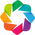

* Set Holoviews with bokeh.

* Loading demo matrix element data from /home/jovyan/QM3/doc-source/part2/n2fitting

*** Job subset details
Key: subset
No 'job' info set for self.data[subset].

*** Job orb6 details
Key: orb6
Dir /home/jovyan/QM3/doc-source/part2/n2fitting, 1 file(s).
{   'batch': 'ePS n2, batch n2_1pu_0.1-50.1eV, orbital A2',
    'event': ' N2 A-state (1piu-1)',
    'orbE': -17.09691397835426,
    'orbLabel': '1piu-1'}

*** Job orb5 details
Key: orb5
Dir /home/jovyan/QM3/doc-source/part2/n2fitting, 1 file(s).
{   'batch': 'ePS n2, batch n2_3sg_0.1-50.1eV, orbital A2',
    'event': ' N2 X-state (3sg-1)',
    'orbE': -17.34181645456815,
    'orbLabel': '3sg-1'}


* Loading demo ADM data from /home/jovyan/QM3/doc-source/part2/n2fitting/N2_ADM_VM_290816.mat...

* Subselecting data...
Subselected from dataset 'orb5', dataType 'matE': 36 from 11016 points (0.33%)
Subselected from dataset 'pol', dataType 'pol': 1 from 3 points (33.33%)
Subselected from dataset 'ADM', dataType 'A

name,value,initial value,min,max,vary,expression
m_PU_SG_PU_1_n1_1_1,1.78461575,1.784615753610107,1.0000e-04,5.00000000,True,
m_PU_SG_PU_1_1_n1_1,1.78461575,1.784615753610107,1.0000e-04,5.00000000,False,m_PU_SG_PU_1_n1_1_1
m_PU_SG_PU_3_n1_1_1,0.80290495,0.802904951323892,1.0000e-04,5.00000000,True,
m_PU_SG_PU_3_1_n1_1,0.80290495,0.802904951323892,1.0000e-04,5.00000000,False,m_PU_SG_PU_3_n1_1_1
m_SU_SG_SU_1_0_0_1,2.68606212,2.686062120382649,1.0000e-04,5.00000000,True,
m_SU_SG_SU_3_0_0_1,1.10915311,1.109153108617096,1.0000e-04,5.00000000,True,
p_PU_SG_PU_1_n1_1_1,-0.86104140,-0.8610414024232179,-3.14159265,3.14159265,False,
p_PU_SG_PU_1_1_n1_1,-0.86104140,-0.8610414024232179,-3.14159265,3.14159265,False,p_PU_SG_PU_1_n1_1_1
p_PU_SG_PU_3_n1_1_1,-3.12044446,-3.1204444620772467,-3.14159265,3.14159265,True,
p_PU_SG_PU_3_1_n1_1,-3.12044446,-3.1204444620772467,-3.14159265,3.14159265,False,p_PU_SG_PU_3_n1_1_1




*** Setup demo fitting workspace OK.


<Figure size 768x576 with 0 Axes>

In [20]:
# Run general config script with dataPath set above
%run {dataPath/"setup_fit_demo.py"} -d {dataPath}

(sec:basic-fitting:running-fits)=
## Fitting the data: Running fits

### Single fit

With the parameters and data set, just call `self.fit()`! For more control, options to the {{ lmfit }} [minimizer function](https://lmfit.github.io/lmfit-py/fitting.html) can be set. Statistics and outputs are also handled by the {{ lmfit }}, which includes uncertainty estimates and correlations in the fitted parameters.

In [21]:
# Run a fit
# data.randomizeParams()  # Randomize input parameters if desired
                          # For method testing using known initial params is also useful

# Run fit with defaults settings
data.fit()

# Additional keyword options can be pass, these are passed to the fitting routine.
# Args are passed to the lmfit minimizer, see https://lmfit.github.io/lmfit-py/fitting.html
# E.g. for scipy Least Squares, options can be found at
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares
# For example, pass convergence tolerances
# data.fit(ftol=1e-10, xtol=1e-10)

In [22]:
# Check fit outputs - self.result shows results from the last fit
data.result

In [23]:
# Fit data is also set to the master data structure with an integer key
data.data.keys()

dict_keys(['subset', 'orb6', 'orb5', 'ADM', 'pol', 'sim', 0])

Dataset: subset, AFBLM
Dataset: 0, AFBLM


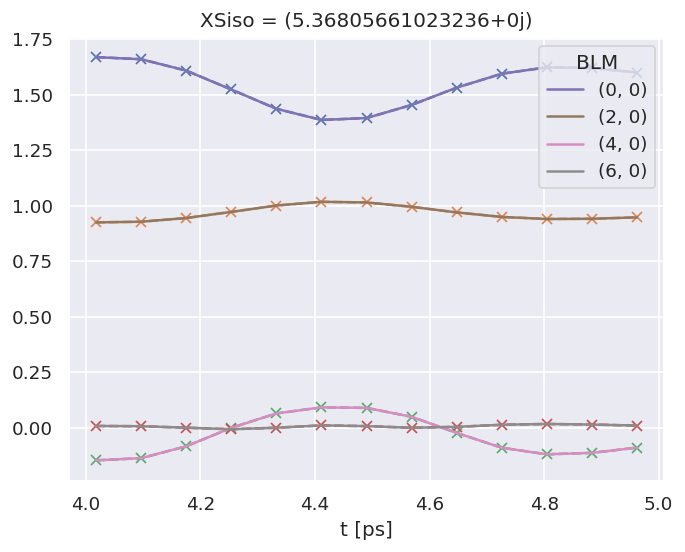

In [24]:
# Plot results with data overlay
# data.BLMfitPlot(backend='hv')   # Set backend='hv' for interactive plots
data.BLMfitPlot()

### Extended execution methods, including parallel and batched execution

See the {{ PEMtk_docs }} for details, particularly the [batch runs demo page](https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_demo_multi-fit_tests_130621-para_010922.html).

**(1) serial execution**

Either:

- Manually with a loop.
- With `self.multiFit()` method, although this is optimised for parallel execution (see below).

In [25]:
# Basic serial example with a loop
import time

start = time.time()

# Maual execution
for n in range(0,10):
    data.randomizeParams()
    data.fit()
    
end = time.time()
print((end - start)/60)
    
# Or run with self.multiFit(parallel = False)
# data.multiFit(nRange = [0,10], parallel = False)

2.086111764113108


In [26]:
# There are now 10 more fit results
data.data.keys()

dict_keys(['subset', 'orb6', 'orb5', 'ADM', 'pol', 'sim', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

**(b) parallel execution**

A basic parallel fitting routine is implemented via the `self.multiFit()` method. This currently uses the [`xyzpy` library](https://xyzpy.readthedocs.io/en/latest/) {cite}`XyzpyDocumentation` for quick parallelization, although there is some additional setup overhead in the currently implementation due to class init per fit batch. The default settings aims to set ~90% CPU usage, based on core-count.

In [27]:
# Multifit wrapper with range of fits specified
# Set 'num_workers' to override the default (~90% of available cores).
data.multiFit(nRange = [0,10], num_workers=20)

100%|##########| 10/10 [00:19<00:00,  1.98s/it]


**(c) Dump data**

Various options are available. The most complete is to use Pickle (default case), which dumps the entire `self.data` structure to file, although this is not suggested for archival use. For details see the {{ ePSproc_docs }}, particularly the [data structures demo page](https://epsproc.readthedocs.io/en/dev/dataStructures/ePSproc_dataStructures_demo_070622.html). For some data types HDF5 routines are available, and are demonstrated for post-processed fit data in the case studies ({numref}`Chapt. %s <chpt:n2-case-study>` - {numref}`Chapt. %s <chpt:c2h4-case-study>`).

In [28]:
outStem = 'dataDump_N2'  # Set for file save later
# Minimal case - timestamped filename
# data.writeFitData()

# Use 'fName' to supply a filename
# data.writeFitData(fName='N2_datadump')

# Use 'outStem' to define a filename which will be appended with a timestamp
# Set dataPath if desired, otherwise will use working dir
data.writeFitData(dataPath = dataPath, outStem=outStem)  

PosixPath('/home/jovyan/QM3/doc-source/part2/n2fitting/dataDump_N2_270723_18-32-11.pickle')

### Batch fit with sampling options

From the basic methods above, more sophisticated fitting strategies can be built. For example, the cell below implements batched fitting with Poission sampling of the data (for statistical bootstrapping).

```python
# Batch fit with data weighting example
batchSize = 50

data.data['weights'] = {}  # Use to log ref weights, will be overwritten otherwise

for n in np.arange(0,100,batchSize):
    print(f'Running batch [{n},{n+batchSize-1}]')

    # Reset weights
    data.setWeights(wConfig = 'poission', keyExpt='sim')
    data.setSubset('sim','weights')   # Set to 'subset' to use for fitting.

    data.data['weights'][n] = data.data['sim']['weights'].copy()
    
    # Run fit batch
    data.multiFit(nRange = [n,n+batchSize-1], num_workers=20)
    
    # Checkpoint - dump data to file
    data.writeFitData(outStem=outStem)
    
```